In [79]:
from pref_voting.profiles_with_ties import *
from pref_voting.voting_methods import *
from pref_voting.analysis import *
from pref_voting.generate_profiles import *
from pref_voting.generate_weighted_majority_graphs import *

from pref_voting.utility_profiles import UtilityProfile, write_utility_profiles_to_json, read_utility_profiles_from_json
from pref_voting.rankings import Ranking
from pref_voting.generate_utility_profiles import *
from pref_voting.generate_utility_profiles import *
from pref_voting.utility_methods import *

from pref_voting.spatial_profiles import SpatialProfile
from pref_voting.generate_spatial_profiles import *
from pref_voting.utility_functions import *
from pref_voting.probabilistic_methods import *
from tqdm.notebook import tqdm
import nashpy as nash
import numpy as np
import random2 as random
from pref_voting.mappings import _Mapping
from multiprocess import Pool, cpu_count, current_process
from numba import njit, float32
import pickle
import json
from pref_voting.monotonicity_axioms import *
from pref_voting.helper import *
from pref_voting.variable_candidate_axioms import *
from pref_voting.profiles import Profile

In [124]:
num_trials = 10000
all_num_cands = [3, 4, 5, 6, 7, 8, 9, 10]
num_voters = 101

data_for_df = {
    "num_cands": [],
    "num_voters": [],
    "num_trials": [],
    "prob_model": [],
    "pr_with_cw": [],
    "pr_with_cycle": [],
    "pr_uniquely_weighted": [],
}


In [125]:

# random margin graph model
for num_cands in tqdm(all_num_cands):
    num_cw = 0
    num_cycles = 0
    num_uniquely_weighted = 0   
    for t in tqdm(range(num_trials), leave=False):
        mg = generate_margin_graph(num_cands)

        if mg.has_cycle():
            num_cycles += 1
        cw = mg.condorcet_winner()
        if cw is not None:
            num_cw += 1
        if mg.is_uniquely_weighted():
            num_uniquely_weighted += 1
            
    data_for_df["num_cands"].append(num_cands)
    data_for_df["num_voters"].append(num_voters)
    data_for_df["num_trials"].append(num_trials)
    data_for_df["prob_model"].append("Random Margin Graph Model")
    data_for_df["pr_with_cw"].append(num_cw / num_trials)
    data_for_df["pr_with_cycle"].append(num_cycles / num_trials)
    data_for_df["pr_uniquely_weighted"].append(num_uniquely_weighted / num_trials)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [126]:

# IC 
for num_cands in tqdm(all_num_cands):
    num_cw = 0
    num_cycles = 0
    num_uniquely_weighted = 0
    
    for t in tqdm(range(num_trials), leave=False):
        
        mg = generate_profile(num_cands, num_voters).margin_graph()

        if mg.has_cycle():
            num_cycles += 1
        cw = mg.condorcet_winner()
        if cw is not None:
            num_cw += 1
        if mg.is_uniquely_weighted():
            num_uniquely_weighted += 1

    data_for_df["num_cands"].append(num_cands)
    data_for_df["num_voters"].append(num_voters)
    data_for_df["num_trials"].append(num_trials)
    data_for_df["prob_model"].append("IC")
    data_for_df["pr_with_cw"].append(num_cw / num_trials)
    data_for_df["pr_with_cycle"].append(num_cycles / num_trials)
    data_for_df["pr_uniquely_weighted"].append(num_uniquely_weighted / num_trials)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [127]:

# MALLOWS 
for num_cands in tqdm(all_num_cands):
    num_cw = 0
    num_cycles = 0
    num_uniquely_weighted = 0

    for t in tqdm(range(num_trials), leave=False):
        
        mg = generate_profile(num_cands, num_voters, probmod="MALLOWS-RELPHI-R").margin_graph()

        if mg.has_cycle():
            num_cycles += 1
        cw = mg.condorcet_winner()
        if cw is not None:
            num_cw += 1
        if mg.is_uniquely_weighted():
            num_uniquely_weighted += 1

    data_for_df["num_cands"].append(num_cands)
    data_for_df["num_voters"].append(num_voters)
    data_for_df["num_trials"].append(num_trials)
    data_for_df["prob_model"].append("MALLOWS-RELPHI-R")
    data_for_df["pr_with_cw"].append(num_cw / num_trials)
    data_for_df["pr_with_cycle"].append(num_cycles / num_trials)
    data_for_df["pr_uniquely_weighted"].append(num_uniquely_weighted / num_trials)



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [128]:
for num_cands in tqdm(all_num_cands):
    num_cw = 0
    num_cycles = 0
    num_uniquely_weighted = 0
    for t in tqdm(range(num_trials), leave=False):
        mg = generate_margin_graph_bradley_terry(num_cands, num_voters)

        if mg.has_cycle():
            num_cycles += 1
        cw = mg.condorcet_winner()
        if cw is not None:
            num_cw += 1
        if mg.is_uniquely_weighted():
            num_uniquely_weighted += 1

    data_for_df["num_cands"].append(num_cands)
    data_for_df["num_voters"].append(num_voters)
    data_for_df["num_trials"].append(num_trials)
    data_for_df["prob_model"].append("Bradley-Terry")
    data_for_df["pr_with_cw"].append(num_cw / num_trials)
    data_for_df["pr_with_cycle"].append(num_cycles / num_trials)
    data_for_df["pr_uniquely_weighted"].append(num_uniquely_weighted / num_trials)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [129]:

df = pd.DataFrame(data_for_df)
df[df["prob_model"] == "IC"] 

,num_cands,num_voters,num_trials,prob_model,pr_with_cw,pr_with_cycle,pr_uniquely_weighted
8,3,101,10000,IC,0.9205,0.0795,0.6880
9,4,101,10000,IC,0.8266,0.2532,0.1364
10,5,101,10000,IC,0.7506,0.4694,0.0022
11,6,101,10000,IC,0.6840,0.6697,0.0000
12,7,101,10000,IC,0.6277,0.8269,0.0000
13,8,101,10000,IC,0.5895,0.9170,0.0000
14,9,101,10000,IC,0.5468,0.9634,0.0000
15,10,101,10000,IC,0.5233,0.9861,0.0000


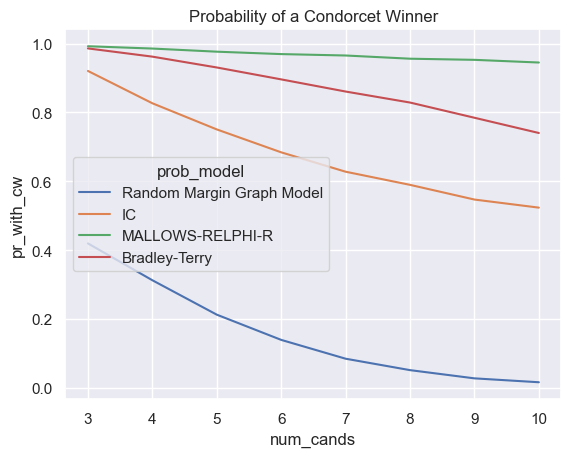

In [135]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="num_cands", y="pr_with_cw", hue="prob_model",  markers=True, dashes=False)
plt.title("Probability of a Condorcet Winner")
plt.savefig("pr_with_cw.pdf")

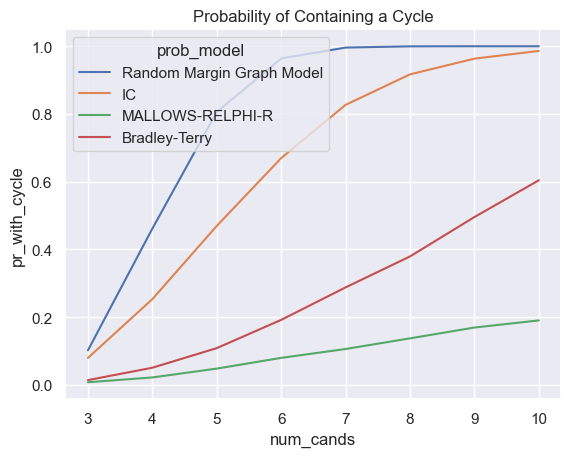

In [137]:
sns.lineplot(data=df, x="num_cands", y="pr_with_cycle", hue="prob_model",  markers=True, dashes=False)
plt.title("Probability of Containing a Cycle")
plt.savefig("pr_with_cycle.pdf")

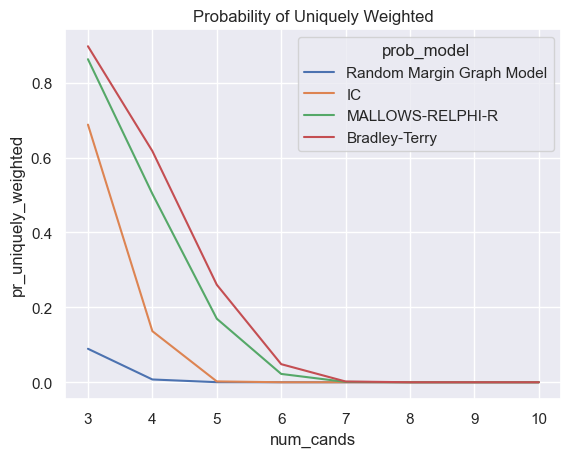

In [136]:
sns.lineplot(data=df, x="num_cands", y="pr_uniquely_weighted", hue="prob_model",  markers=True, dashes=False)
plt.title("Probability of Uniquely Weighted")
plt.savefig("pr_uniquely_weighted.pdf")

In [2]:
import pref_voting
print(pref_voting.__version__)

0.5.32


In [4]:
from prefsampling.ordinal.impartial import impartial


prof = Profile(impartial(10, 2, seed=None))

prof.display()

prof.anonymize().display()

prof.display()

+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 | 1 | 0 | 0 | 1 | 0 | 1 |
+---+---+---+---+---+---+---+---+---+---+
+---+---+
| 7 | 3 |
+---+---+
| 0 | 1 |
| 1 | 0 |
+---+---+
+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 | 1 | 0 | 0 | 1 | 0 | 1 |
+---+---+---+---+---+---+---+---+---+---+


In [60]:
rng = np.random.default_rng(10012)
print(gamma.rvs(0.8, random_state=rng))
print(gamma.rvs(0.8, random_state=rng))
print(gamma.rvs(0.8, random_state=rng))

0.05041468918240317
1.725090099498795
0.16134003712341477


In [63]:
from prefsampling.ordinal import impartial, impartial_anonymous, urn

def generate_profiles2(num_candidates, num_voters, **kwargs): 

    if 'probmodel' in kwargs:
        probmodel = kwargs['probmodel']
    else: 
        probmodel = "IC"

    if 'seed' in kwargs:
        seed = kwargs['seed']
    else: 
        seed = None
    
    if 'num_profiles' in kwargs:
        num_profiles = kwargs['num_profiles']
    else: 
        num_profiles = 1
    
    if 'anonymize' in kwargs: 
        anonymize = kwargs['anonymize']
    else:
        anonymize = False

    if probmodel == "IC" or probmodel == 'impartial': 
        
        profs = [Profile(impartial(num_voters, 
                                   num_candidates, 
                                   seed=seed))  
                                   for _ in range(num_profiles)]
    
    elif probmodel == "IAC" or probmodel == 'impartial_anonymous': 
        
        profs = [Profile(impartial_anonymous(num_voters, 
                                             num_candidates, 
                                             seed=seed)) 
                                             for _ in range(num_profiles)]

    elif probmodel == "URN" or probmodel == 'urn': 

        if 'alpha' in kwargs: 
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
            
        profs = [Profile(urn(num_voters,
                             num_candidates, 
                             alpha,
                             seed=seed)) 
                             for _ in range(num_profiles)]


    elif probmodel == "URN-10":
        
        alpha = 10
        profs = [Profile(urn(num_voters,
                             num_candidates, 
                             alpha,
                             seed=seed)) 
                             for _ in range(num_profiles)]
    
    elif probmodel == "URN-0.3":
        
        alpha = round(math.factorial(num_candidates) * 0.3)
        profs = [Profile(urn(num_voters,
                             num_candidates, 
                             alpha,
                             seed=seed)) 
                             for _ in range(num_profiles)]
        
    elif probmodel == "URN-R":
        
        rng = np.random.default_rng(seed)
        alpha = round(math.factorial(num_candidates) * gamma.rvs(0.8, random_state=rng))
        profs = [Profile(urn(num_voters,
                             num_candidates, 
                             alpha,
                             seed=seed)) 
                             for _ in range(num_profiles)]
        
    if anonymize: 
        profs = [prof.anonymize() for prof in profs]
    return profs[0] if num_profiles == 1 else profs


In [78]:
generate_profiles2(3, 4,  anonymize=True, probmodel="URN-R")



+---+
| 4 |
+---+
| 0 |
| 1 |
| 2 |
+---+


In [3]:
prob_models = {
    "IC": {
        "func": create_rankings_urn,
        "param": 0,
    },  # IC model is the Urn model with alpha=0
    "IAC": {"func": create_rankings_urn, "param": 1},  # IAC model is urn with alpha=1
    "MALLOWS-0.8": {"func": create_rankings_mallows, "param": 0.8},
    "MALLOWS-0.2": {"func": create_rankings_mallows, "param": 0.2},
    "MALLOWS-R": {
        "func": create_rankings_mallows,
        "param": lambda nc: random.uniform(0.001, 0.999),
    },
    "MALLOWS-RELPHI-0.4": {
        "func": create_rankings_mallows,
        "param": lambda nc: phi_from_relphi(nc, 0.4),
    },
    "MALLOWS-RELPHI-0.375": {
        "func": create_rankings_mallows,
        "param": lambda nc: phi_from_relphi(nc, 0.375),
    },
    "MALLOWS-RELPHI-0": {
        "func": create_rankings_mallows,
        "param": lambda nc: phi_from_relphi(nc, 0),
    },
    "MALLOWS-RELPHI-1": {
        "func": create_rankings_mallows,
        "param": lambda nc: phi_from_relphi(nc, 1),
    },
    "MALLOWS-RELPHI-R": {
        "func": create_rankings_mallows,
        "param": lambda nc: phi_from_relphi(nc),
    },
    "MALLOWS-RELPHI-R2": {
        "func": create_rankings_mallows,
        "param": lambda nc: phi_from_relphi(nc, random.uniform(0.001, 0.5)),
    },
    "MALLOWS_2REF-0.8": {"func": create_rankings_mallows_two_rankings, "param": 0.8},
    "MALLOWS_2REF-RELPHI-R": {
        "func": create_rankings_mallows_two_rankings,
        "param": lambda nc: phi_from_relphi(nc),
    },
    "MALLOWS_2REF-RELPHI-R2": {
        "func": create_rankings_mallows_two_rankings,
        "param": lambda nc: phi_from_relphi(nc, random.uniform(0.001, 0.5)),
    },
    "URN-10": {"func": create_rankings_urn, "param": 10},
    "URN-0.1": {
        "func": create_rankings_urn,
        "param": lambda nc: round(math.factorial(nc) * 0.1),
    },
    "URN-0.3": {
        "func": create_rankings_urn,
        "param": lambda nc: round(math.factorial(nc) * 0.3),
    },
    "URN-R": {
        "func": create_rankings_urn,
        "param": lambda nc: round(math.factorial(nc) * gamma.rvs(0.8)),
    },
    "SinglePeaked": {"func": create_rankings_single_peaked, "param": None},
}


def get_replacement(num_cands, param):
    return int(num_cands * param)


def generate_profile(num_cands, num_voters, probmod="IC", probmod_param=None):
    """Generate a :class:`Profile` with ``num_cands`` candidates and ``num_voters`` voters using the  probabilistic model ``probmod`` (with parameter ``probmod_param``).

    :param num_cands: the number of candidates in the profile
    :type num_cands: int
    :param num_voters: the number of voters in the profile
    :type num_voters: int
    :param probmod: the probability model used to generate the :class:`Profile`
    :type probmod: str, optional (default "IC")
    :param probmod_param: a parameter to the probability model
    :type probmod_param: number or function, optional
    :returns: A profile of strict linear orders
    :rtype: Profile


    :Example:

    .. exec_code::

        from pref_voting.generate_profiles import generate_profile
        prof = generate_profile(4, 10) # default is probmod is IC
        prof.display()
        prof = generate_profile(4, 10, probmod="IAC")
        prof.display()
        prof = generate_profile(4, 10, probmod="URN-0.3")
        prof.display()
        prof = generate_profile(4, 10, probmod="MALLOWS-R")
        prof.display()
        prof = generate_profile(4, 10, probmod="MALLOWS-RELPHI-0.375")
        prof.display()
        prof = generate_profile(4, 10, probmod="SinglePeaked")
        prof.display()

    :Possible Values of probmod:

    - "IC" (Impartial Culture);
    - "IAC" (Impartial Anonymous Culture);
    - "URN-10" (URN model with :math:`\\alpha=10`), "URN-0.1"  (URN model with :math:`\\alpha=0.1*num\_cands!`), "URN-0.3" (URN model with :math:`\\alpha=0.3*num\_cands!`), "URN-R" (URN model with randomly chosen :math:`\\alpha`);
    - "MALLOWS-0.8" (Mallows model with :math:`\\phi=0.8`), "MALLOWS-0.2" (Mallows model with :math:`\\phi=0.2`), "MALLOWS-R" (Mallows model with :math:`\\phi` randomly chosen between 0 and 1);
    - "MALLOWS-RELPHI-0.4" (Mallows model with :math:`\\phi` defined from ``num_cands`` and the relphi value of 0.4), "MALLOWS-RELPHI-0.375" (Mallows model with :math:`\\phi` defined from ``num_cands`` and the relphi value of 0.375), "MALLOWS-RELPHI-0" (Mallows model with :math:`\\phi` defined from ``num_cands`` and the relphi value of 0),  "MALLOWS-RELPHI-1" (Mallows model with :math:`\\phi` defined from ``num_cands`` and the relphi value of 1), (Mallows model with :math:`\\phi` defined from ``num_cands`` and the relphi value randomly chosen based on the number of candidates), "MALLOWS-RELPHI-R2" (Mallows model with :math:`\\phi` defined from ``num_cands`` and the relphi value randomly chosen), "MALLOWS_2REF-0.8" (Mallows model with 2 reference rankings and :math:`\\phi = 0.8`),
    - "MALLOWS_2REF-RELPHI-R": (Mallows model with 2 reference rankings and :math:`\\phi` defined from ``num_cands`` and a randomly chosen relphi value based on the number of candidates), "MALLOWS_2REF-RELPHI-R2"(Mallows model with 2 reference rankings and :math:`\\phi` defined from ``num_cands`` and a randomly chosen relphi value); and
    - "SinglePeaked" (Single Peaked)

    In addition, you can customize the probability model used to generate a profile as follows:

    - ``probmod`` is "URN" and ``probmod_param`` is either a number or a function :math:`f` and the parameter is defined by applying :math:`f` to the number of candidates.

    - ``probmod`` is "MALLOWS" and ``probmod_param`` is either a number or a function :math:`f` and the parameter is defined by applying :math:`f` to the number of candidates.

    - ``probmod`` is "MALLOWS_2REF" and ``probmod_param`` is either a number or a function :math:`f` and the parameter is defined by applying :math:`f` to the number of candidates.

    :Example:

    .. exec_code::

        import math
        from pref_voting.generate_profiles import generate_profile
        prof = generate_profile(4, 10, probmod="URN", probmod_param=5)
        prof.display()
        prof = generate_profile(4, 10, probmod="MALLOWS", probmod_param=0.5)
        prof.display()
        prof = generate_profile(4, 10, probmod="MALLOWS_2REF", probmod_param=0.5)
        prof.display()
        prof = generate_profile(4, 10, probmod="URN", probmod_param=lambda nc: math.factorial(nc) * 0.5)
    """

    if probmod in prob_models.keys():

        create_rankings = prob_models[probmod]["func"]
        _probmod_param = prob_models[probmod]["param"]

    elif probmod == "Spatial":

        num_dims = probmod_param[0] if probmod_param is not None else 2
        voter_utility = probmod_param[1] if probmod_param is not None else linear_utility

        sprof = generate_spatial_profile(num_cands, num_voters, num_dims=num_dims)

        return sprof.to_utility_profile(utility_function=voter_utility).to_ranking_profile()
    elif probmod == "URN":

        create_rankings = create_rankings_urn
        _probmod_param = probmod_param if probmod_param is not None else 0

    elif probmod == "MALLOWS":

        create_rankings = create_rankings_mallows
        _probmod_param = probmod_param if probmod_param is not None else 1

    elif probmod == "MALLOWS_2REF":

        create_rankings = create_rankings_mallows_two_rankings
        _probmod_param = probmod_param if probmod_param is not None else 1

    else:
        print(f"{probmod}: Probability model not implemented, no profile generated.")
        return None

    probmod_param = (
        _probmod_param(num_cands) if callable(_probmod_param) else _probmod_param
    )

    rankings, rcounts = create_rankings(num_cands, num_voters, probmod_param)

    return Profile(rankings, rcounts=rcounts)



In [5]:
from prefsampling.ordinal.impartial import impartial


In [17]:
for i in range(10): 
    print(impartial(3, 5), "\n")

[[3 0 2 1 4]
 [1 3 2 4 0]
 [2 1 4 3 0]] 

[[3 0 2 4 1]
 [2 4 1 0 3]
 [4 0 3 2 1]] 

[[1 3 2 4 0]
 [1 3 2 4 0]
 [2 3 1 0 4]] 

[[0 3 2 4 1]
 [4 0 1 2 3]
 [3 0 4 2 1]] 

[[0 3 2 1 4]
 [3 4 1 2 0]
 [3 1 4 2 0]] 

[[2 0 1 4 3]
 [1 2 3 4 0]
 [0 4 3 2 1]] 

[[3 2 1 0 4]
 [4 2 0 3 1]
 [0 3 2 4 1]] 

[[4 0 3 2 1]
 [3 1 4 0 2]
 [2 3 1 0 4]] 

[[1 3 4 0 2]
 [0 4 3 2 1]
 [2 1 4 3 0]] 

[[4 1 2 3 0]
 [0 4 2 3 1]
 [3 0 1 4 2]] 

